## horse vs human data
1. 모델개선 작업
2. 개시너된 모델과 다른 모델의 벤치 마크(성능비교)
3. 최고 성능을 보이는 모델 파일 저장

- VGG. RES 추천
- 이미지 전처리; 여백은 하얗게 OR 블랙, 사이즈 조절, 사진 돌리기, 찌그러트리기 등등 
- 데이터 증강 => 모델이 조금 더 일관적인 일반화 가능해진다.
- 컬러; 색 정보를 없애거나(회색,모노이미지로 바꾸기) 희석시키기(컬러노이즈). 
- DROPOUT LAYER(0.7=70프로 버리기), GAUSSIAN LAYER ; 파라미터 1은 강한거야.


In [1]:
# 패키지 불러오기
import os
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# early stopping
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

horse: 1454
human: 1436


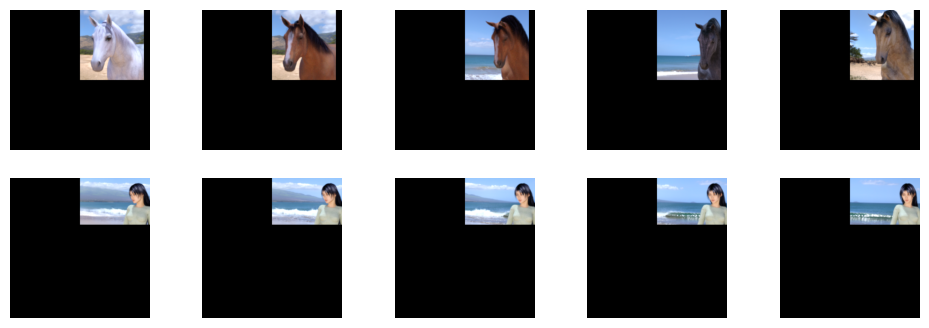

In [2]:

# 데이터셋 경로 지정
train_horse_dir = './train_added/horses'
train_human_dir = './train_added/humans'


# 학습 데이터 리스트업
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

horse_files = [train_horse_dir + '/' + f for f in train_horse_names]
human_files = [train_human_dir + '/' + f for f in train_human_names]

# 학습 데이터의 개수 확인
print('horse:', len(train_horse_names))
print('human:', len(train_human_names))

# 데이터 미리보기
fig, axes = plt.subplots(2,5, figsize=(12,4))
ax = np.reshape(axes, -1)

for i, path in enumerate(horse_files[:5] + human_files[:5]):
    img = plt.imread(path)
    ax[i].axis('off')
    ax[i].imshow(img)

plt.show()

In [3]:
# 모델 설계
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

c:\Users\user\anaconda3\anconda3.1\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 5, 5, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,465 (1.02 MB)

 Trainable params: 266,465 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(loss='binary_crossentropy',
            optimizer=Adam(learning_rate=0.001),
            metrics=['accuracy'])

In [5]:
# 이미지 값을 0~1 사이로 제한
train_datagen = ImageDataGenerator(rescale=1/255)

# train set
train_generator = train_datagen.flow_from_directory(
  'train',
  target_size=(300, 300),  # 해상도 조절
  batch_size=128,  # 배치 크기
  class_mode='binary'  # 분류 방법
)

# valid set
valid_generator = train_datagen.flow_from_directory(
  'valid',
  target_size=(300, 300),
  batch_size=128,
  class_mode='binary'
)

es = EarlyStopping(
  monitor='loss', # loss에 따라 학습을 할지 말지 정하겠다
  patience=3
)

checkpoint = ModelCheckpoint(  # 좋았던 모델 임시저장
  filepath='./checkpoint.keras',
  verbose=2,  # 2: 상세하게 보여줘
  save_best_only=True,  # 학습지표가 좋은 거 보여줄게
  mode='auto'
)



Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [6]:
# 모델 학습
history = model.fit(
  train_generator,
  steps_per_epoch=8,
  epochs=15,
  verbose=1,
  callbacks=[checkpoint, es]
)

Epoch 1/15


c:\Users\user\anaconda3\anconda3.1\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 564ms/step - accuracy: 0.6064 - loss: 0.6889
Epoch 2/15


c:\Users\user\anaconda3\anconda3.1\Lib\site-packages\keras\src\callbacks\model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6641 - loss: 0.6630  
Epoch 3/15


c:\Users\user\anaconda3\anconda3.1\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 663ms/step - accuracy: 0.6166 - loss: 0.6176
Epoch 4/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 725us/step - accuracy: 0.8984 - loss: 0.3584
Epoch 5/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.8782 - loss: 0.3156
Epoch 6/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.9141 - loss: 0.2142
Epoch 7/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 558ms/step - accuracy: 0.9413 - loss: 0.1623
Epoch 8/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9375 - loss: 0.1398  
Epoch 9/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 549ms/step - accuracy: 0.9439 - loss: 0.1506
Epoch 10/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9375 - loss: 0.2027  
Epoch 11/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 534ms/step - accuracy: 0.9440 - loss: 0.1361
Epoch 12/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 0s/step - accuracy: 0.9844 - loss: 0.0818   
Epoch 13/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 556ms/step - accuracy: 0.9670 - loss: 0.0888
Epoch 14/15
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9297 - loss: 0.1828 

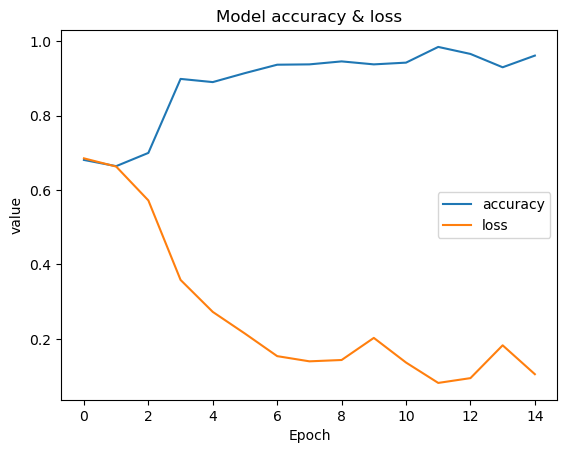

In [7]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model accuracy & loss')
plt.xlabel('Epoch')
plt.ylabel('value')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [8]:
# 모델 검증
results = model.evaluate(valid_generator)
print("test loss, test acc:", results)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.8125 - loss: 0.9235
test loss, test acc: [0.9356583952903748, 0.80859375]


In [9]:
# 이미지 전처리
dlist = 'test12/'
predict_list = os.listdir(dlist)
print(predict_list)

img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (300,300)) for i in img]
img = np.array(img)
img = img.astype('float32') / 255.0

# 분류
cutoff = .5
predictions = model.predict(img)
print(predictions >= cutoff)



['horse (1).jpg', 'horse (1).png', 'horse (10).jpg', 'horse (11).jpg', 'horse (12).jpg', 'horse (13).jpg', 'horse (14).jpg', 'horse (15).jpg', 'horse (16).jpg', 'horse (17).jpg', 'horse (18).jpg', 'horse (19).jpg', 'horse (2).jpg', 'horse (2).png', 'horse (20).jpg', 'horse (21).jpg', 'horse (22).jpg', 'horse (23).jpg', 'horse (24).jpg', 'horse (25).jpg', 'horse (26).jpg', 'horse (27).jpg', 'horse (28).jpg', 'horse (29).jpg', 'horse (3).jpg', 'horse (3).png', 'horse (30).jpg', 'horse (31).jpg', 'horse (32).jpg', 'horse (33).jpg', 'horse (34).jpg', 'horse (35).jpg', 'horse (36).jpg', 'horse (37).jpg', 'horse (38).jpg', 'horse (39).jpg', 'horse (4).jpg', 'horse (4).png', 'horse (40).jpg', 'horse (41).jpg', 'horse (42).jpg', 'horse (43).jpg', 'horse (44).jpg', 'horse (45).jpg', 'horse (46).jpg', 'horse (47).jpg', 'horse (48).jpg', 'horse (49).jpg', 'horse (5).jpg', 'horse (50).jpg', 'horse (51).jpg', 'horse (52).jpg', 'horse (53).jpg', 'horse (54).jpg', 'horse (55).jpg', 'horse (56).jpg', 

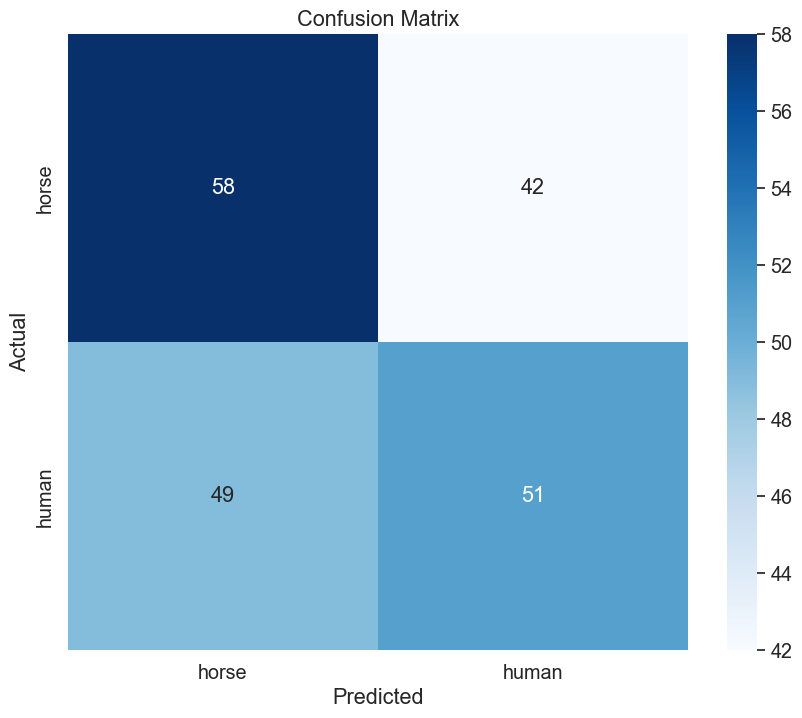

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set(font_scale=1.3)
y_true = np.array([0]*100 + [1]*100)
y_pred = predictions
y_pred_classes = np.round(y_pred).astype(int).flatten()  # 예측값을 0 또는 1로 변환
# Confusion Matrix 계산
cm = confusion_matrix(y_true, y_pred_classes)
# Confusion Matrix 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["horse", "human"],
    yticklabels=["horse", "human"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [12]:
# model.save('./model_hh4.keras') # 모델 저장하기